#  Machine learning prediction on tiny IoT devices

### Övergripande beskrivning av systemet

#### Mål med detta arbete är att under 2 veckor ta fram en PoC för implmentering av Machine learning i en liten enhet.
#### Enhet:
* IoT enhet ska vara i klass med en Atmel328p MC i syfte att visa förmåga på liknande hårvaruklass.
* IoT Enhet har ständig trömförsöjning 
* IoT enhet ska via BLE skicka både sensordata och utfall av klassificering på minst gång/sekund
#### Klassificering:
* Ska ske utigrån sensordata och en tränad model.
* Systemet ska skunne genomföra klassificering av minst två (2) olika klasser baserat på sensordata.
* Modellen ska ha en noggranhet på minst 95%
* Modellen ska kunna genomföra en klassning utifrån en input av minst 5 datapunkter (int16) under en (1) sekund
#### Centralenhet:
* För demonstration
* Systemet ska skicka sensor/klassnings-utfall via BLE till en consol-app (skall) samt Mobiltefon med APP(Bör) 


I takt med den stora ökning av uppkopplade enheter så skapas det stora mängder "sensor"data.
Där det är lämplig kan tränade machine-learning modellen genomföra väldig komplexa analyser och klassificering av sensordata/förutspå trender.
Detta genererar värdefulla insikter som man senare kan dra nytta för att dra rätt slutsatser eller fatta, i detta fallet, data-drivna beslut.

Medans det är bra att skunna skicka stora volymer data för analys online kan så kan detta innebära problem vid t.ex
-Brist på internetuppkoppling
-behov av omedelvar åtgärd (millisekunder)

### Varför?
Det kan då vara lämpligt att kunna göra analyser i lokalmiljö. Sk Edge computing. Då finns det vanligligtviss en PC med bättre prestanda ( kan vara RPI t.ex ) och denna kan ta emot data från flera sensorer i realtid, flitrera och analysera datan och slutligen skicka en "batch" till någon online instans.

Vid vissa fall kan det till och med finns krav på omedelbar åtgärd utan möjliga fördjörningar. Det kan t.ex vara att det lokala nätverket kan vara nere eller överbelastad. Det kanske finns ett säkerhetsaspekt med möjlig personfara eller stora ekonomiska försluter och då ska rätt lösning väljas.

### Vad
Detta arbetet går ut på att implementera en sådan lösning där Klassificering sker direkt i en "tunn" IoT enhet. 

### Systemskiss
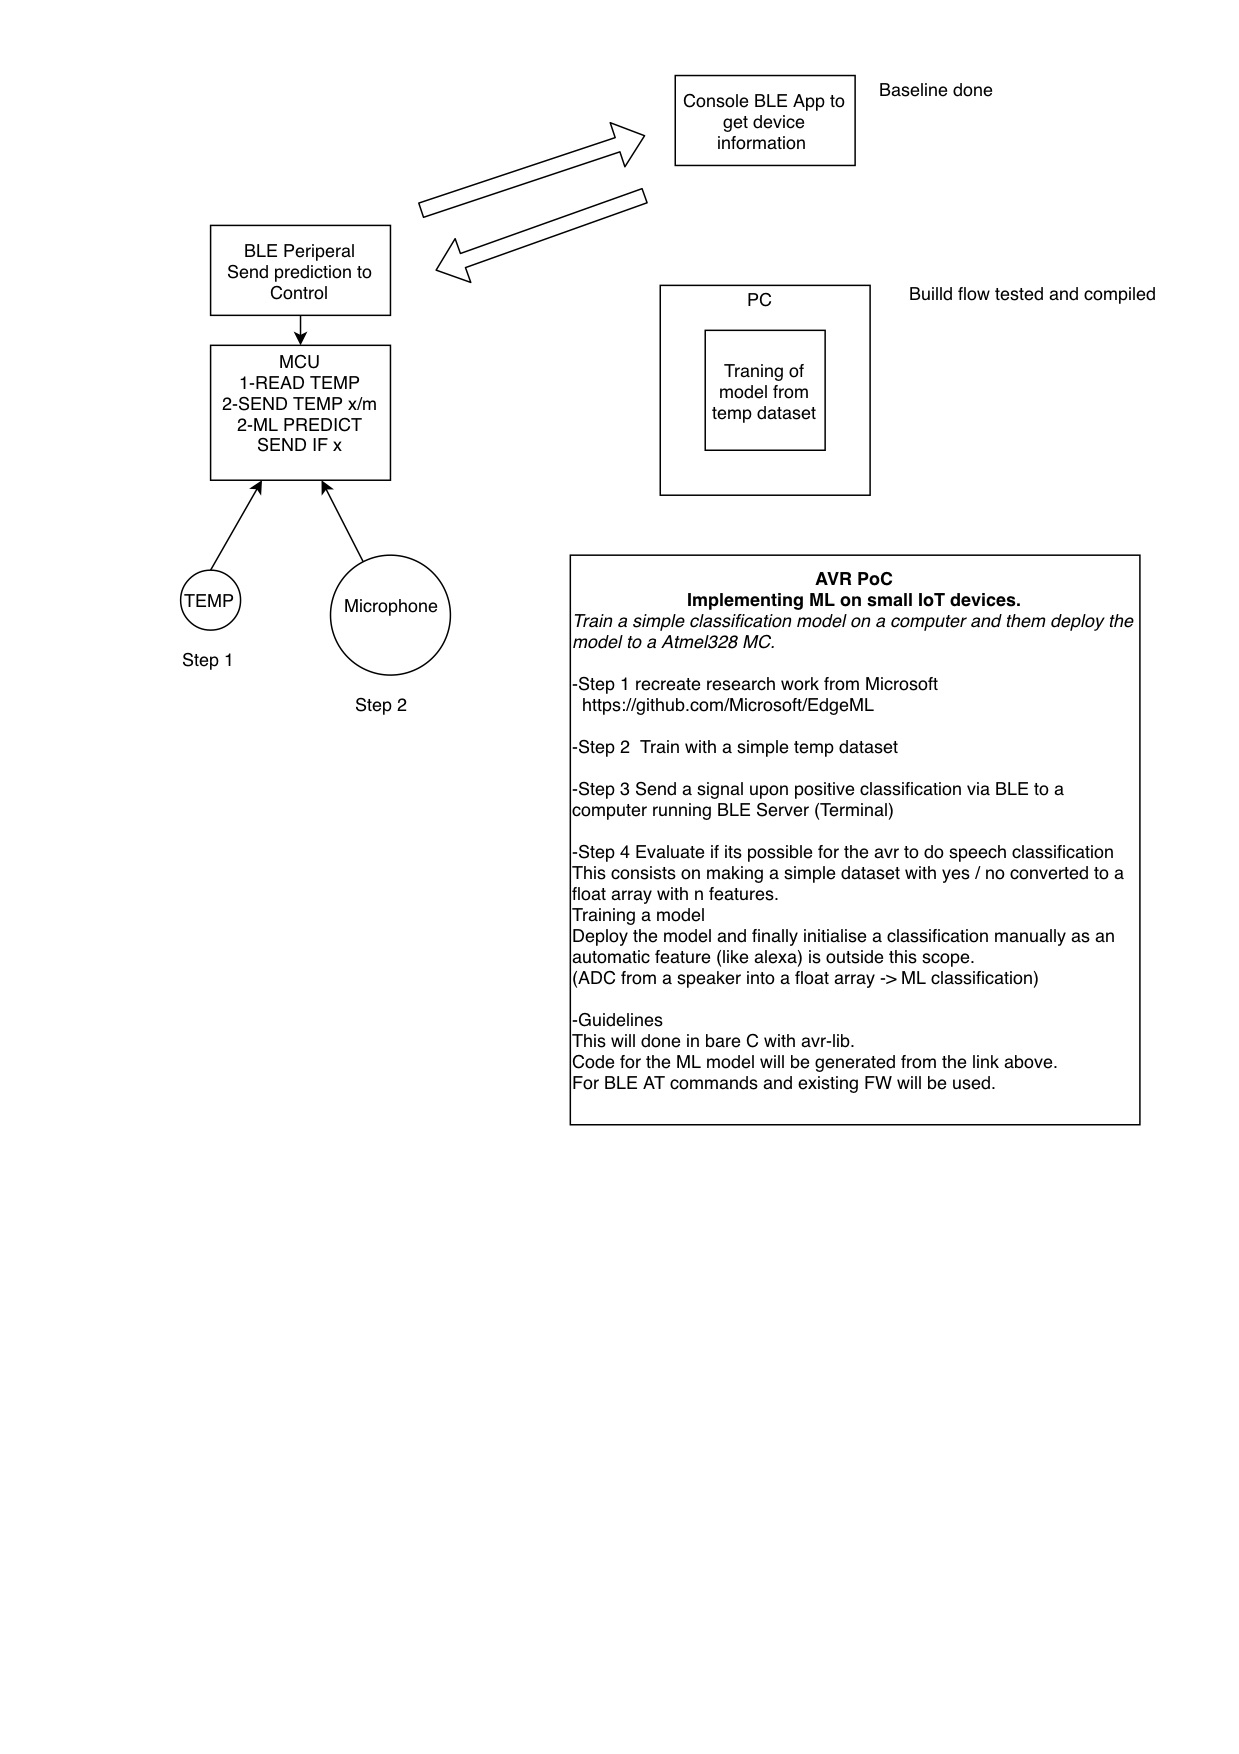
### Systemering/design av den del du valt att implementera
Har implementerat enligt målet

### Dina ursprungliga tidsestimat
Det som tog mes tid var att få igång hela ML workflow. Inledningsviss att få igång miljön och duplicera test resultaten tog 1-2 dygn därefter att få igång det på Atmelkretsen var en stor utmaning. 
Coden från Microsoft Indien är endast för PC/Intel (C++). Det fanns dock en "Pull request" med Android kod men väldig odokumenterad. Utmaningen var att dels få igång det som såsom skaparen avsedde (Med Arduino) därefter fick jag konvertera till ren AVR/C. Det var en rolig övning.

### De avgränsningar som gjorts, eventuellt ’future work’
Träning av modelen kan avsevärt förbättras och det var utanför scopet denna gång.

### Elscheman på relevanta delar
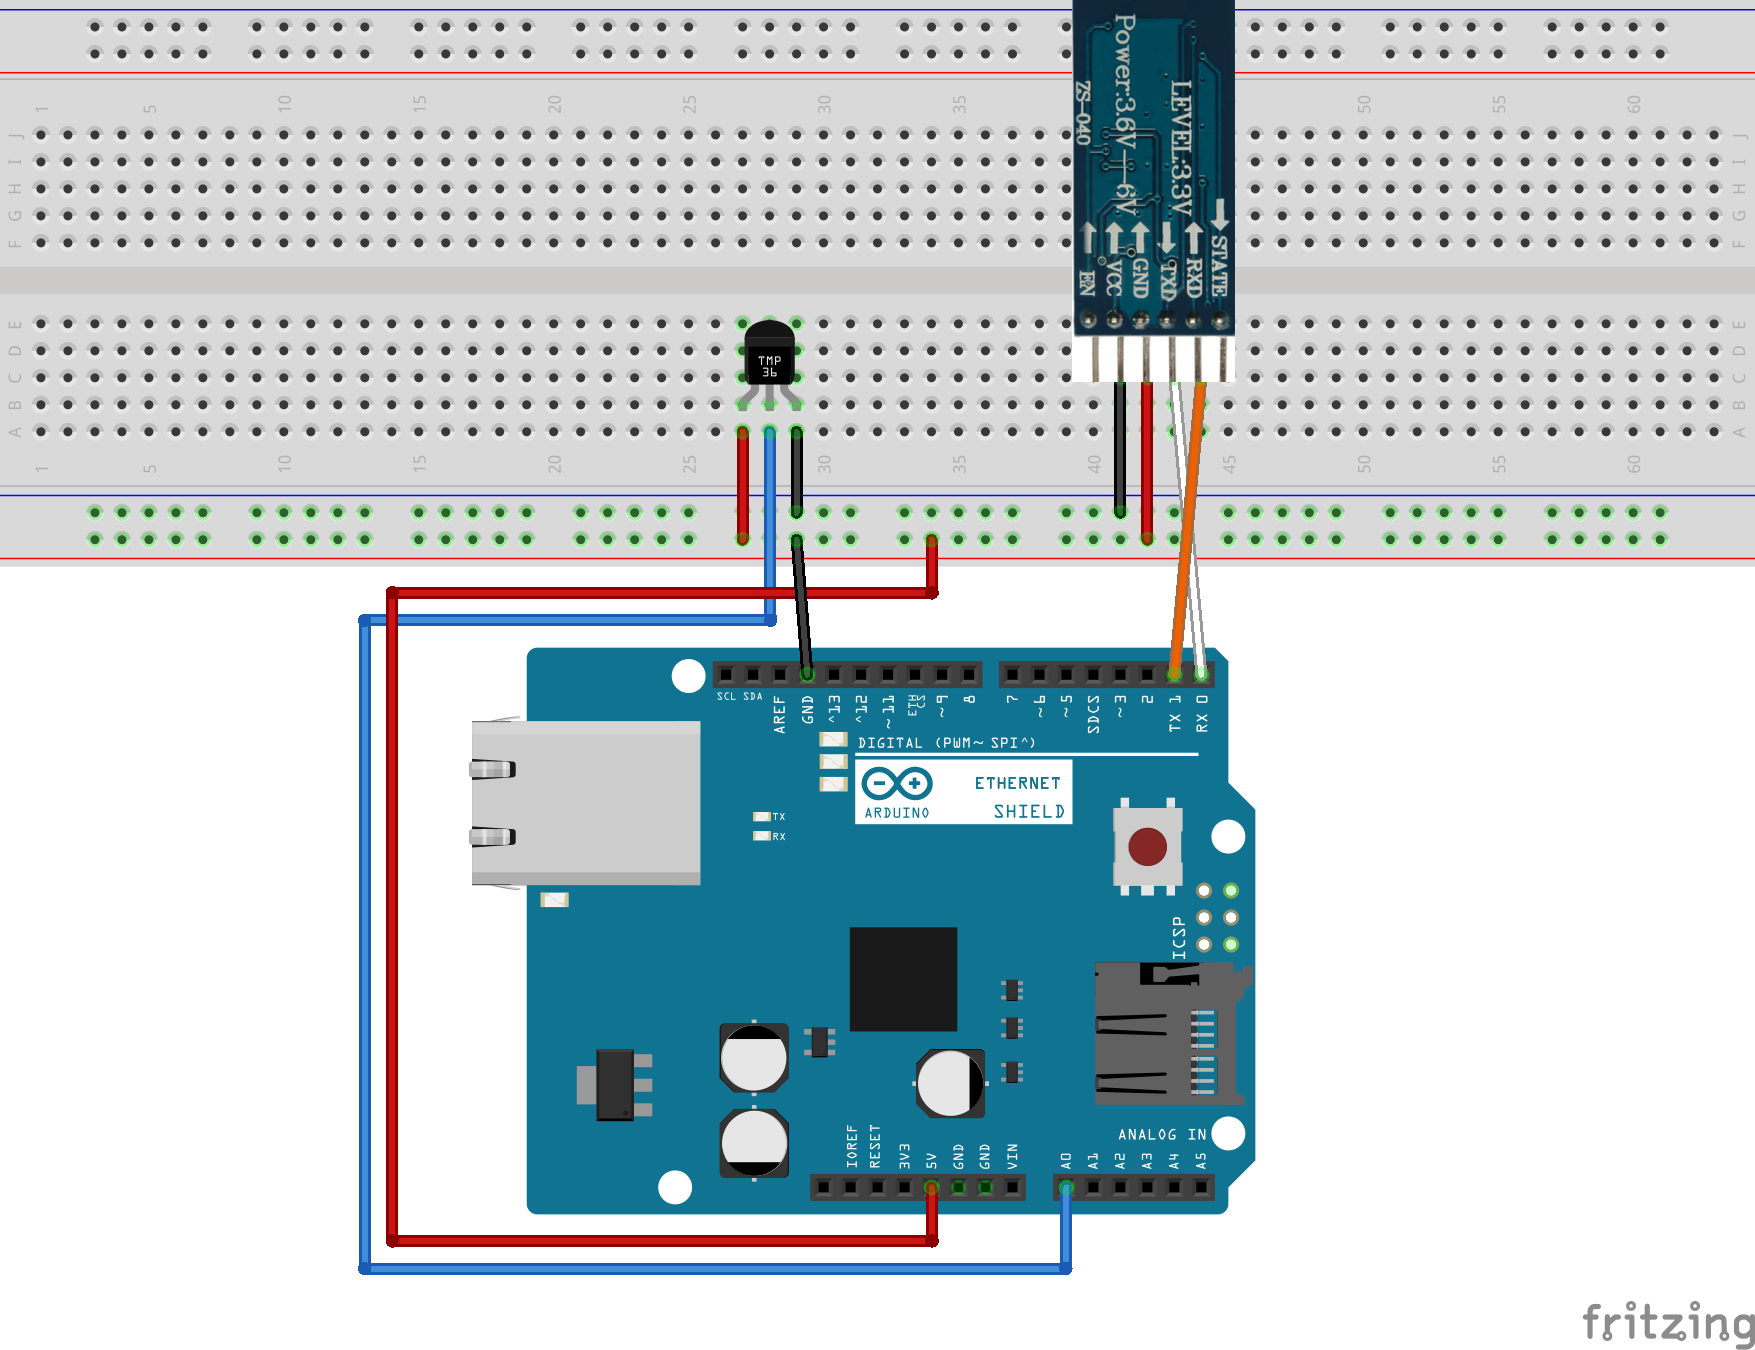
### En reflektion över vad som gick bra/dåligt, hur väl höll tidsuppskattningarna?
Som vanligt, jag vill för mycket!
Men jag rodde ihamn det hela på ett bra sätt. Jag har definitivt fått mersmak för samtliga ämnen inte minst ML delen som har get mig fler nya insikter. BLE är något som jag kommer att utveckla mer av bl.a Pairing/Bonding säkerhet. 

Det var intressant att jobba med "ej produktions kod"/research. Kunskaperna ställs på sin spets då skaparen har gjort koden för att visa ett resulat i en begräsad och specifik miljö.
Det blev en del debug och uppfiningsrikedom för att få det att fungera.
En stor positiv effekt var möjligheten att förkovra sig i delar jag aldrig berört som BLE protokoll-säkerhet, "FrontEnd" osv.
Mkt jobb, sena kvällar, en berg och dalbana....


## Workflow
### 1 Återskapa ML Projekt från Microsoft
https://github.com/Microsoft/EdgeML


### 2 Verifiera att det fungerar med stardard Dataset
Detta gjordes i två steg
Steg ett i PC miljö med USPS10 dataset (Handwriten digits)
https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass.html#usps
Ref: J. J. Hull. 
A database for handwritten text recognition research. 
IEEE Transactions on Pattern Analysis and Machine Intelligence, 16(5):550-554, May 1994.

Steg två att skapa ett eget dataset
Problemet ska vara sådan att det är lämplig att använda ML då data och dess värden förändras och då räcker inte matematiska beräkdningar eller simpel logik
Problemformulering:
Kan vi träna en model att hitta en viss mönster i strömande data?

### 3 Få igång allt på Atmel328
https://github.com/Microsoft/EdgeML/tree/fixed-point/fixed-point
Det är väldigt viktigt att tranings datasetet är korrekt formaterad, detta samt bristfällig doumentation gjorde detta steget det mest tidskrävande.
Ovan lösning skapar Arduino kod som kan köras direkt för verifiering. Med lite förändringar gick det att få till ren AVR.

### 4 Skapa ett eget dataset från sensordata
Detta är det absolut svåraste och mest omfattande. För detta arbetet ville jag bara skapa ett eget dataset något som är svårt då det är jag skälv som skapar ett problem.
Men tanken är följande:
Kan vi träna modellen att hitta ett visst mönster i tempdata?

Jag började sampla temperatur en gång / sekund under 10 sek och för att kunna simulera en avikelse så höll jag för sensor men handen i ca 2-3 sekunder. Avsiken är att skapa ett mönster. Det skulle kunna vara att en viss maskin eller "sak" beter sig annorlunda / negativt och man har detta data.
Då är det detta ett lämpligt ML problem.


(26, 28)

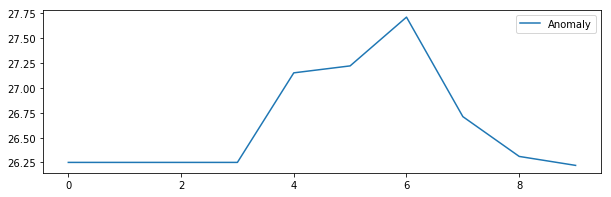

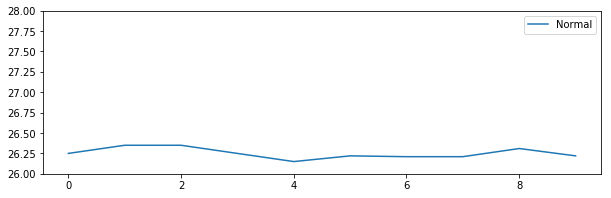

In [75]:
#ML data for demonstration
from matplotlib import pyplot as plt
import pandas as pd

dataClassOne = [26.25,26.25,26.25,26.25,27.15,27.22,27.71,26.71,26.31,26.22]
dataClassOTwo = [26.25,26.35,26.35,26.25,26.15,26.22,26.21,26.21,26.31,26.22]
df = pd.DataFrame(dataClassOne, columns=['Anomaly'])
df_2 = pd.DataFrame(dataClassOTwo, columns=['Normal'])
df.plot(figsize=(10,3))
df_2.plot(figsize=(10,3))
plt.ylim(26,28)


Utmaingen med att skapa dessa dataset är att annotera varje specifik klass samt att ta fram data som faktiskt ger insikter och inte brus.
En begränsing i ett sådant problem är hur själva mätningarna ska göras och isolerar en serie om 10 data punkter?
Här skapar jag delt ett påhittat problem och ett tillhörade dataset, för demonstration

Problemmönstret utspelar sig på ca 5-6 sekunder alltså måste vi sampla både före och efter.
Samtidigt kan vi inte ta var 10e sekund, risken finns att vi klipper av det intressanta mönstret antingen i början eller i slutet

Utmaningar...
Vi ska se till att fånga all data, för att lösa det valde jag en sk "rolling window" om 10 punkter som hela tiden fylls på med nytt.
En sak att se upp med detta är att modellen kommer sannolikt att ge utslag flera gånger då mönstret kommer att vara synligt flera gånger under dessa 10 steg.


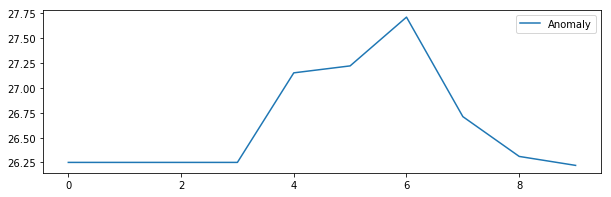

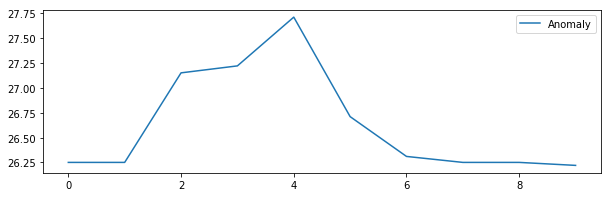

In [76]:
dataClassOne = [26.25,26.25,27.15,27.22,27.71,26.71,26.31,26.25,26.25,26.22]
df_rolling = pd.DataFrame(dataClassOne, columns=['Anomaly'])
df.plot(figsize=(10,3))
df_rolling.plot(figsize=(10,3))


Det är viktigt att ha detta i åtanke när man försöker hitta lämpliga lösningar. I detta fall kan det vara så att att problemmet är isolerat till x tillfällen. Dvs det är inte relevant om det händer flera gånger inom loppet av x minuter/timmar, utan det är att det faktiskt händer.

Det andra kan vara att vi vet detta händer x gånger / dygn. Med analys kan man försöka eliminera risken för "falska positiva"



### 5 Skapa applikation till AVR
Utgick från baseline och började med att få in temperaturdata med en ADC.
När det var klart började jag skicka ut data via BLE.

Detta visade sig problematiskt i början då BLE modulen för detta labb hade endast UART och Arduino UNO har endast 1 sådan som används för USB.

Började titta på att implementera en Software-UART men insåg att det skulle ta för lång tid och det visade sig att det gick att köra både PC-USB samt UART mot BLE om man delar TX/RX pin. 
Detta är kanske inte optimalt men PC delen skulle endast användas för att läsa värden, ibland. 
Att programmera AVR gick inte med BLE modul inkopplad givetviss.
SW-UART var något som jag kommer vilja implementera någong gång i framtiden.

#### BLE Modul. 
En del tid gick åt att sätta mig in i BLE stacken, säkerhet, Services, Characteristics osv.
Det var lärorikt. Praktiskt var det ännu enklare, jag konfigurerade modulen som Pheriperal, ställde in UUID för Service samt Chracteristic och skickade data med printf().
Det konfig gjorde jag med random noname BLE sketch för arduino så det är AT kommandon och jag sparade tid.

Det var enkelt att kontrollera att modulen fungerade och sände data med vanliga "BLE" appar till iOS.

#### Consol app
Ligger under /Bleclient
https://github.com/noble/noble
Gjorde en väldig enkel app i Node.Js och Noble modulen för BLE.

#### iOS app
/Blclient/test
I syfte att lära mig mera react-native och göra min första app.
Använde motsvarade modul för react-native
https://github.com/Polidea/react-native-ble-plx
Sedan en ekel GUI för att visa Status samt data Notifieringar

De delar som jag gjorde var scan, connect, disconnect, subscribe till service.
Viss fellogik för att koppla upp/ner samt skanna behövdes i övrigt saknas discovery möjlighter, och en mer robust hantering av tjänster/data. 

#### Säkerhet
För denna labb gjordes ingen implementation av säkehet för BLE då det ligger utanför ram. I verklighten skulle passwords användas för attt koppla upp sig, begränsa "WRITE" chracteristics samt att begräns BLE uppklipplingen om det inte finns behov att ha ständig länk.


### Begränsningar
Ingen hänsyn har tagit till extra features som sppel mode på AVR eller hur ofta BLE meddelanden ska gå fram då detta arbete har främst syftat till att påvisa en teknisk förmåga som är genisk och kan appliceras på olika områden/problem.


### Slutsatser
Det finns många områden att fördjupa sig inom ML, i detta faller var det intressant att se hur litet man kan gå. Små enheter blir mindre och billigare samtidigt som måga AI tekniker blir kraftfullare så finns det alltid behov för små/kraftsnåla och billga komponenter där "vanlig" ML kan göra stor nytta

Förutom att klassficera mellan olika klassen går det att göra regression samt avikelsedetektering med andra algoritmer. 
Utmaningen är att hitta bra data och att formatera det så att modelen blir robust. 
